# Unsupervised Learning
## K- clustering

Charytanowicz,Magorzata, Niewczas,Jerzy, Kulczycki,Piotr, Kowalski,Piotr, and Lukasik,Szymon. (2012). Seeds. UCI Machine Learning Repository. https://doi.org/10.24432/C5H30K.

**Informação do conjunto de dados**

O grupo examinado incluiu **grãos** pertencentes a três variedades diferentes de **trigo**: Kama, Rosa e Canadian, com 70 elementos cada, seleccionados aleatoriamente para a experiência.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cols = ["area", "perimetro", "compacidade", "comprimento", "largura","assimetria","sulco","classe"]
df =  pd.read_csv("seeds_dataset.txt", names=cols,sep="\t+", engine="python")

In [5]:
df.head(3)

,area,perimetro,compacidade,comprimento,largura,assimetria,sulco,classe
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1


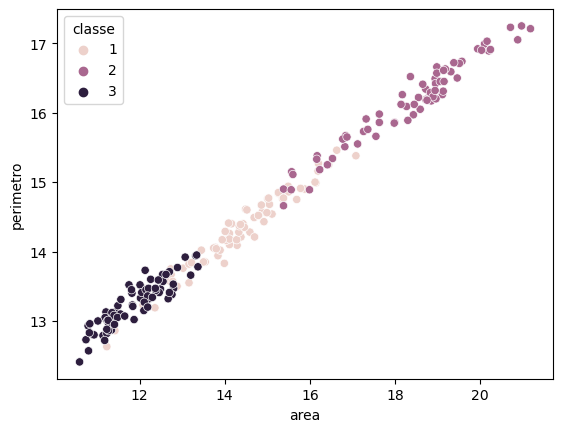

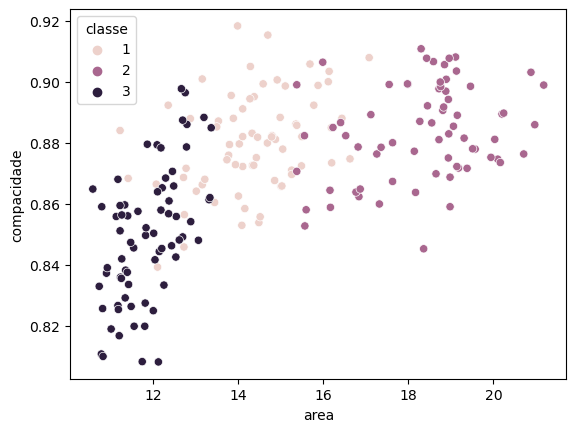

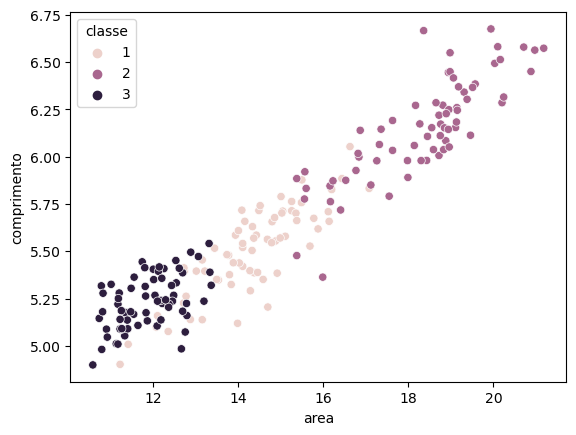

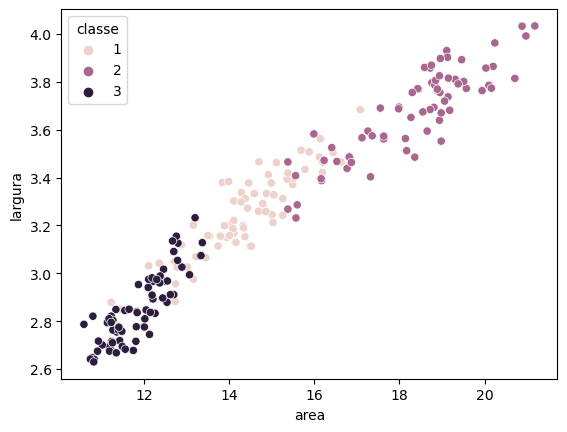

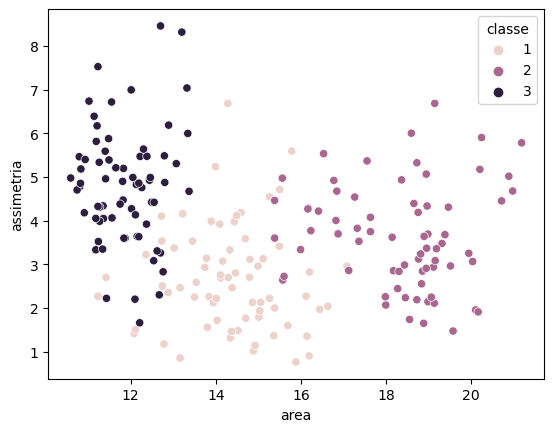

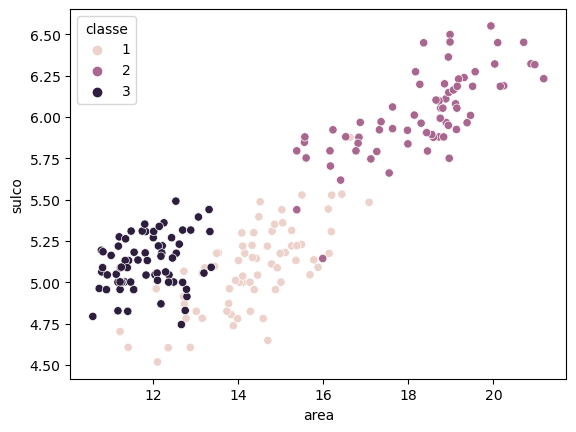

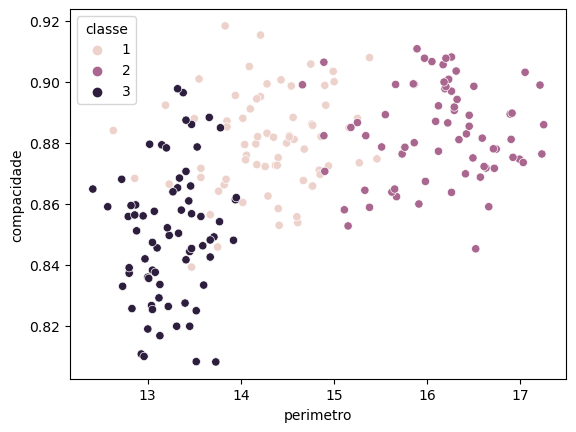

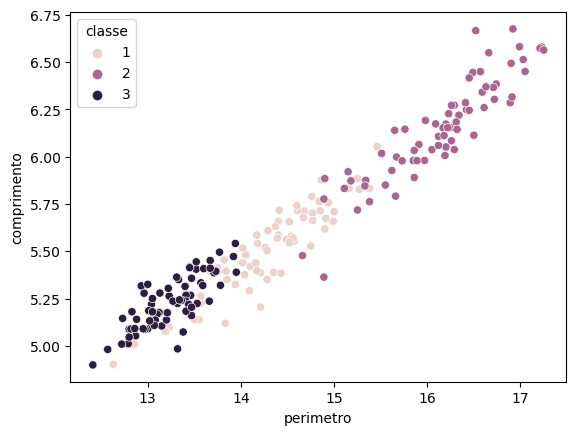

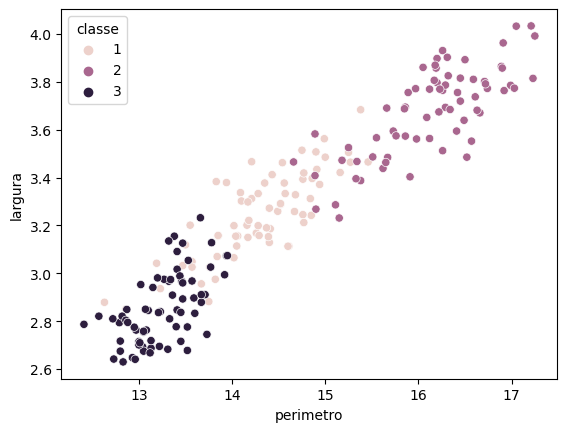

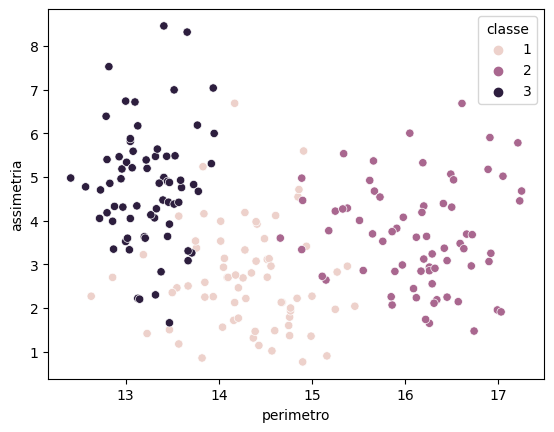

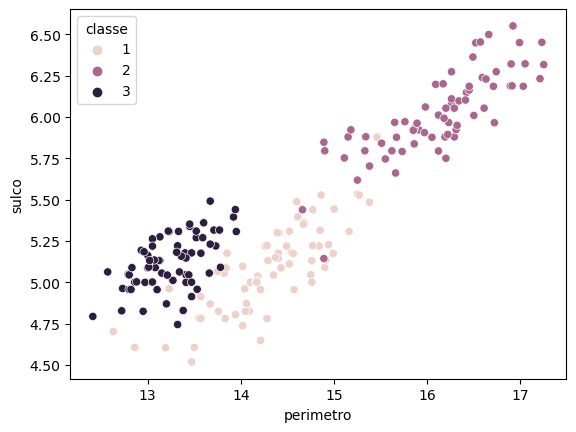

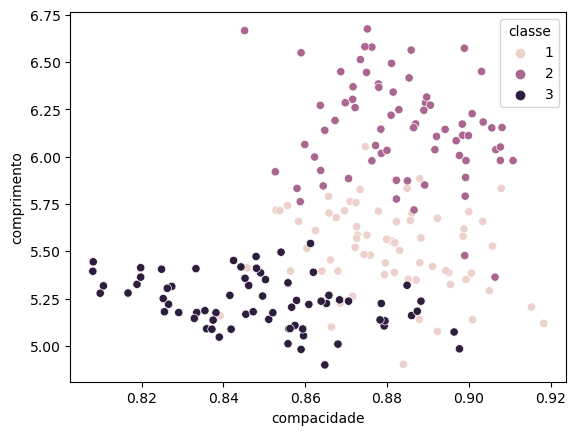

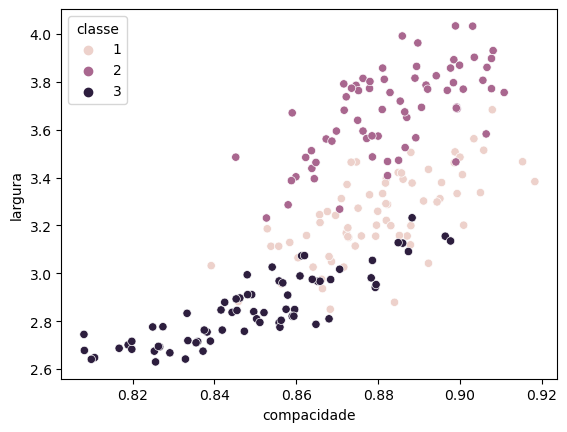

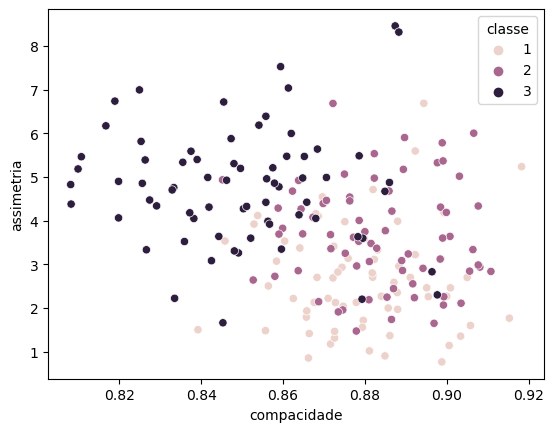

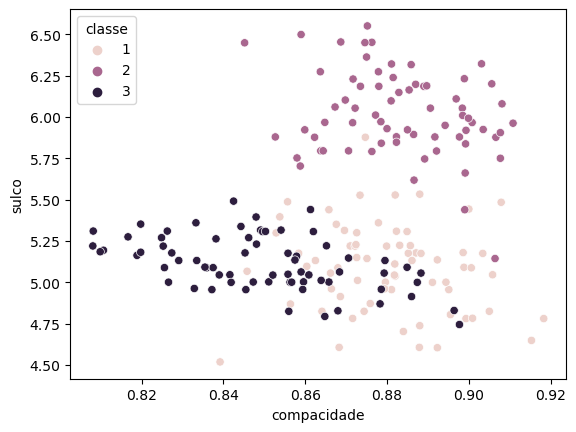

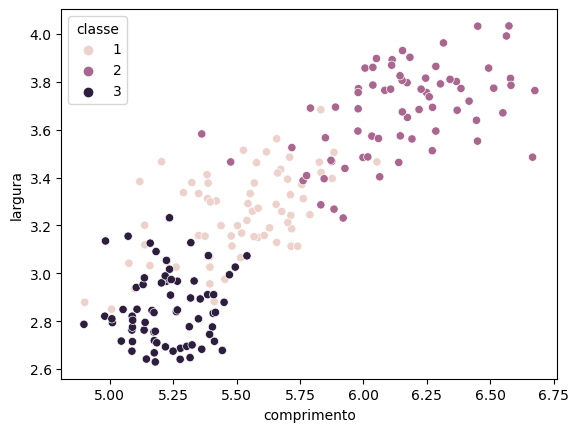

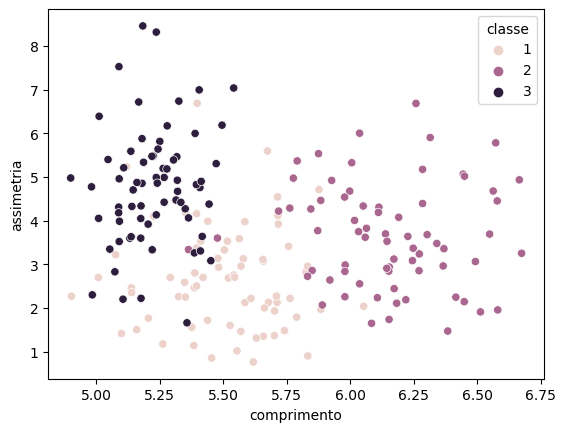

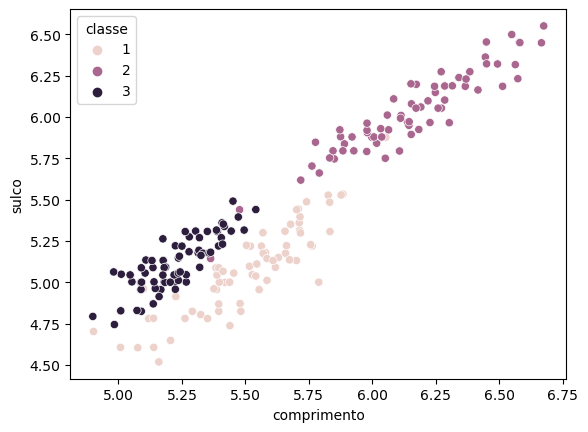

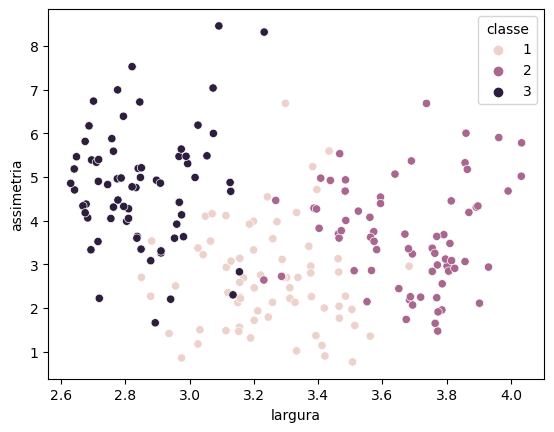

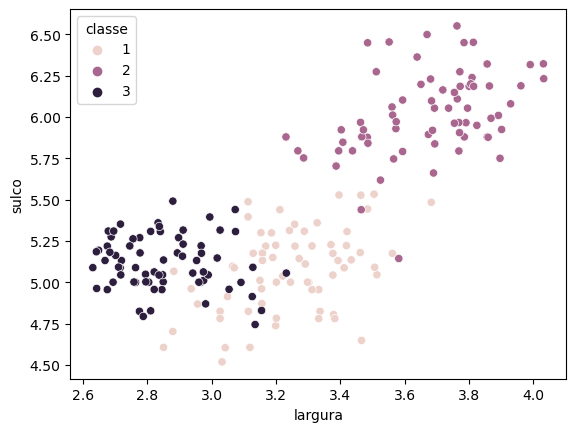

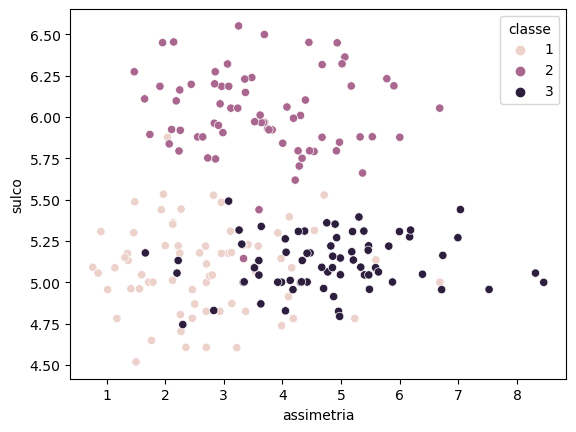

In [8]:
for i in range(len(cols)-1):
    for j in range(i+1, len(cols)-1):
        x_label = cols[i]
        y_label = cols[j]
        sns.scatterplot(x=x_label, y=y_label, data=df, hue="classe")
        plt.show()

## Clustering (agrupamento)

In [9]:
from sklearn.cluster import KMeans

In [11]:
x = "perimetro"
y = "assimetria"
X = df[[x,y]].values

In [12]:
kmeans = KMeans(n_clusters=3).fit(X)

In [13]:
clusters = kmeans.labels_
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 2, 0, 2, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [15]:
df["classe"].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [16]:
cluster_df = pd.DataFrame(np.hstack((X,clusters.reshape(-1,1))), columns=[x,y,"classe"])

In [18]:
cluster_df.head()

,perimetro,assimetria,classe
0,14.84,2.221,2.0
1,14.57,1.018,2.0
2,14.09,2.699,2.0
3,13.94,2.259,2.0
4,14.99,1.355,2.0


[]

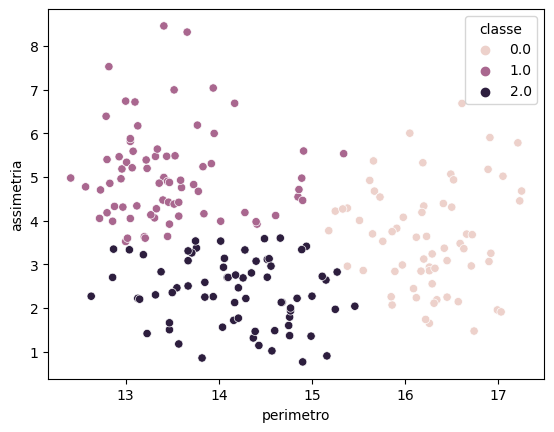

In [19]:
# K Means classes
sns.scatterplot(x=x, y=y, hue="classe", data=cluster_df)
plt.plot()

[]

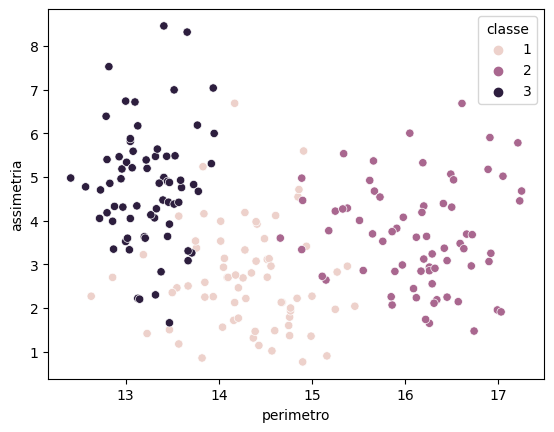

In [39]:
# classes originais
sns.scatterplot(x=x, y=y, hue="classe", data=df)
plt.plot()

## Dimensões Superiores

In [23]:
X = df[cols[:-1]].values

In [24]:
kmeans = KMeans(n_clusters=3).fit(X)
cluster_df = pd.DataFrame(np.hstack((X,clusters.reshape(-1,1))),columns=df.columns)

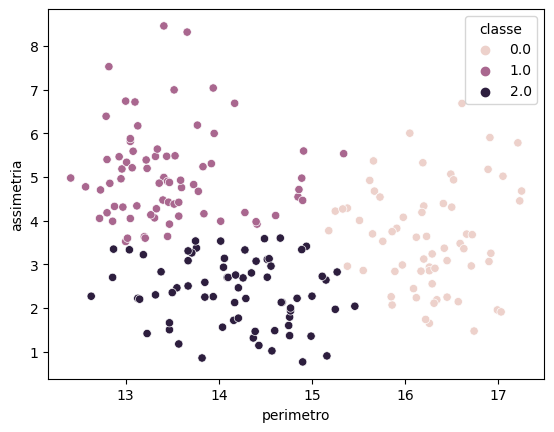

In [25]:
# Kmeans classes
sns.scatterplot(x=x, y=y, hue="classe", data=cluster_df)
plt.show()

[]

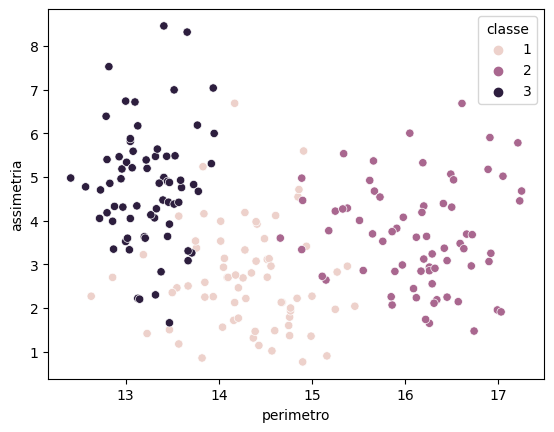

In [38]:
# classes originais
sns.scatterplot(x=x, y=y, hue="classe", data=df)
plt.plot()

## PCA

In [27]:
from sklearn.decomposition import PCA

In [28]:
pca = PCA(n_components=2)
transformed_x = pca.fit_transform(X)

In [29]:
X.shape

(210, 7)

In [30]:
transformed_x.shape

(210, 2)

In [31]:
transformed_x[:5]

array([[ 0.66344838, -1.41732098],
       [ 0.31566651, -2.68922915],
       [-0.6604993 , -1.13150635],
       [-1.0552759 , -1.62119002],
       [ 1.61999921, -2.18338442]])

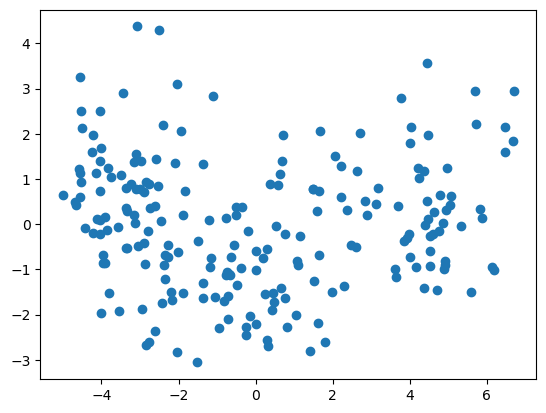

In [32]:
plt.scatter(transformed_x[:,0],transformed_x[:,1])
plt.show()

In [33]:
kmeans_pca_df = pd.DataFrame(np.hstack((transformed_x, kmeans.labels_.reshape(-1,1))),columns=["pca1","pca2","classe"])

In [34]:
truth_pca_df = pd.DataFrame(np.hstack((transformed_x, df["classe"].values.reshape(-1,1))),columns=["pca1","pca2","classe"])

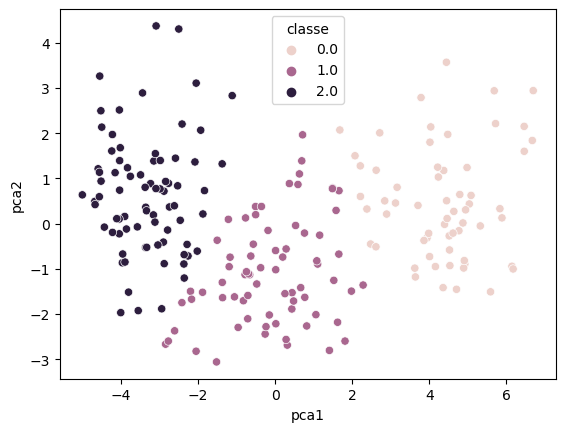

In [36]:
# Kmeans classes pca
sns.scatterplot(x="pca1", y="pca2", hue="classe", data=kmeans_pca_df)
plt.show()

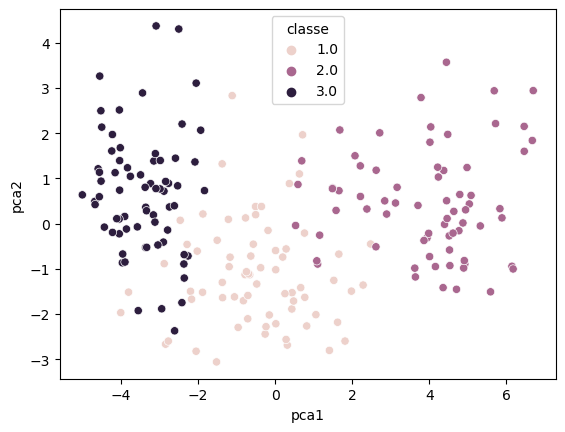

In [37]:
# Kmeans classes pca
sns.scatterplot(x="pca1", y="pca2", hue="classe", data=truth_pca_df)
plt.show()